In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load data
filepath_csv = "./TLSE00FRA_R_20240010100_15M_30S_MO.csv"

# parse cv and create pd.DataFrame
data_prx = pd.read_csv(
        filepath_csv,
        comment="#", # ignore lines beginning with '#' 
        parse_dates=["time_of_reception_in_receiver_time"], # consider columns "time_of_reception_in_receiver_time"  as pd.Timestamp
    )

# filter the data
data_gps_c1c = data_prx[
    (data_prx["constellation"] == "G")  # keep only GPS data
    & (data_prx["rnx_obs_identifier"] == "1C")  # keep only L1C/A observations (this comes from the RINEX format)
].reset_index(drop=True) # reset index of the DataFrame in order to have a continuous range of integers, after deleting some lines

# print the number of observations
print(
    f"There are {len(data_gps_c1c)} GPS L1 C/A observations"
)

# display first rows of DataFrame
data_gps_c1c.head(
)

There are 346 GPS L1 C/A observations


,time_of_reception_in_receiver_time,sat_clock_offset_m,sat_clock_drift_mps,sat_pos_x_m,sat_pos_y_m,sat_pos_z_m,sat_vel_x_mps,sat_vel_y_mps,sat_vel_z_mps,ephemeris_hash,...,sat_elevation_deg,sat_azimuth_deg,rnx_obs_identifier,C_obs_m,D_obs_hz,L_obs_cycles,LLI,S_obs_dBHz,constellation,prn
0,2024-01-01 01:00:00,-152141.861130,0.001636,1.756231e+07,6.321040e+06,1.949029e+07,874.779458,2192.354064,-1517.011863,15493926700203654105,...,72.762067,71.752022,1C,2.099176e+07,-498.480,1.103125e+08,0.0,50.2,G,2
1,2024-01-01 01:00:00,28445.063892,0.007975,1.993373e+07,-6.856874e+06,1.594259e+07,-1217.847462,1658.096549,2226.395164,14289568684793800537,...,68.006077,-105.443667,1C,2.038718e+07,1145.262,1.071354e+08,0.0,50.0,G,3
2,2024-01-01 01:00:00,76259.610205,0.002965,2.562521e+07,5.811356e+05,-7.208175e+06,837.857615,438.262292,2996.510097,13596841372546252783,...,17.565770,-179.796259,1C,2.390761e+07,3705.184,1.256353e+08,0.0,39.4,G,4
3,2024-01-01 01:00:00,-47916.893671,-0.000579,2.622087e+07,5.256293e+06,-1.689992e+06,-239.404937,227.144964,-3127.293693,11485340274872676417,...,30.160321,166.699100,1C,2.305669e+07,-3416.848,1.211639e+08,0.0,42.0,G,8
4,2024-01-01 01:00:00,85859.535564,0.003102,1.144543e+07,-2.216706e+07,8.870047e+06,989.422666,-629.859461,-2875.686139,8059450626340085262,...,18.726075,-92.653983,1C,2.365022e+07,-1738.480,1.242827e+08,0.0,39.1,G,14


In [5]:
# display existing columns
data_gps_c1c.columns

Index(['time_of_reception_in_receiver_time', 'sat_clock_offset_m',
       'sat_clock_drift_mps', 'sat_pos_x_m', 'sat_pos_y_m', 'sat_pos_z_m',
       'sat_vel_x_mps', 'sat_vel_y_mps', 'sat_vel_z_mps', 'ephemeris_hash',
       'frequency_slot', 'relativistic_clock_effect_m', 'sagnac_effect_m',
       'tropo_delay_m', 'sat_code_bias_m', 'carrier_frequency_hz',
       'iono_delay_m', 'sat_elevation_deg', 'sat_azimuth_deg',
       'rnx_obs_identifier', 'C_obs_m', 'D_obs_hz', 'L_obs_cycles', 'LLI',
       'S_obs_dBHz', 'constellation', 'prn'],
      dtype='object')

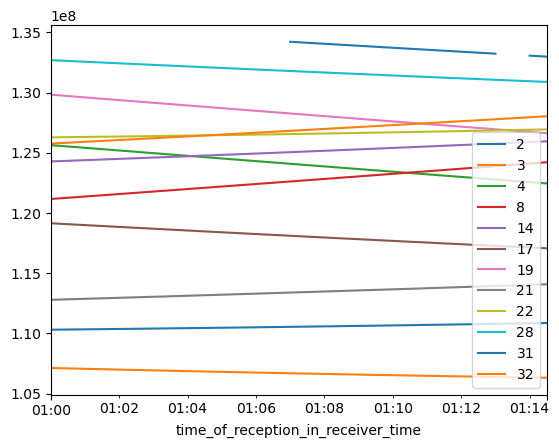

In [6]:
# plot all carrier phase observations in the same plot
fig, ax = plt.subplots()
data_gps_c1c.groupby( 
    "prn"  # creates group according to value of "prn" column
    ).plot(  # calls plot function on each group
        x="time_of_reception_in_receiver_time",
        y="L_obs_cycles",
        ax=ax,  # plot on the same graph
    );
plt.legend(data_gps_c1c.groupby("prn").groups.keys())

In [7]:
# count numbers of detected cycle slips
(data_gps_c1c.LLI == 1).sum()

17

In [8]:
# show the rows where the cycle slips occur
data_gps_c1c.loc[data_gps_c1c.LLI == 1,["time_of_reception_in_receiver_time","prn","LLI"]]

,time_of_reception_in_receiver_time,prn,LLI
42,2024-01-01 01:01:30,28,1.0
53,2024-01-01 01:02:00,28,1.0
86,2024-01-01 01:03:30,28,1.0
97,2024-01-01 01:04:00,28,1.0
164,2024-01-01 01:07:00,31,1.0
211,2024-01-01 01:09:00,28,1.0
235,2024-01-01 01:10:00,28,1.0
247,2024-01-01 01:10:30,28,1.0
254,2024-01-01 01:11:00,14,1.0
271,2024-01-01 01:11:30,28,1.0
